# Big Project
## Group 10 - Data Under Construction

### Setup Notebook

In [2]:
!pip install geopandas

In [6]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

### 1. Collecting and Cleaning Data 

#### 1.1 Zillow Rent Data

Refer to cleaning data notebook notebook

#### 1.2 .... Rent Data

Refer to notebook

#### 1.3 Neighbourhoods Data

### 2. Exploratory Data Analysis

#### Import Data. The data cleaning step created one single clean csv file, which will be used here

In [177]:
df = pd.read_csv('filtered_data_with_neighbourhood_rank.csv')
df.head()

,Property URL,Rental price,Living area,Bedrooms,Bathrooms,Street address,Latitude,Longitude,Neighbourhood,Neighbourhood Rank
0,https://www.zillow.com/homedetails/413-Markham...,2400.0,900.0,1.0,1.0,413 Markham St,43.660350,-79.410310,Palmerston-Little Italy,9
1,https://www.zillow.com/homedetails/1221-King-S...,2200.0,500.0,1.0,1.0,1221 King St W,43.638584,-79.427666,South Parkdale,144
2,https://www.zillow.com/homedetails/47-Lower-Ri...,2200.0,500.0,1.0,1.0,47 Lower River St,43.656498,-79.355540,Moss Park,69
3,https://www.zillow.com/homedetails/120-Rowntre...,1645.0,800.0,1.0,1.0,120 Rowntree Mill Rd,43.753500,-79.577644,Humber Summit,151
4,https://www.zillow.com/homedetails/1100-Sheppa...,2400.0,626.0,1.0,1.0,1100 Sheppard Ave W,43.751930,-79.466700,York University Heights,145


In [36]:
df.shape

(377, 10)

#### Distribution of Rent Prices

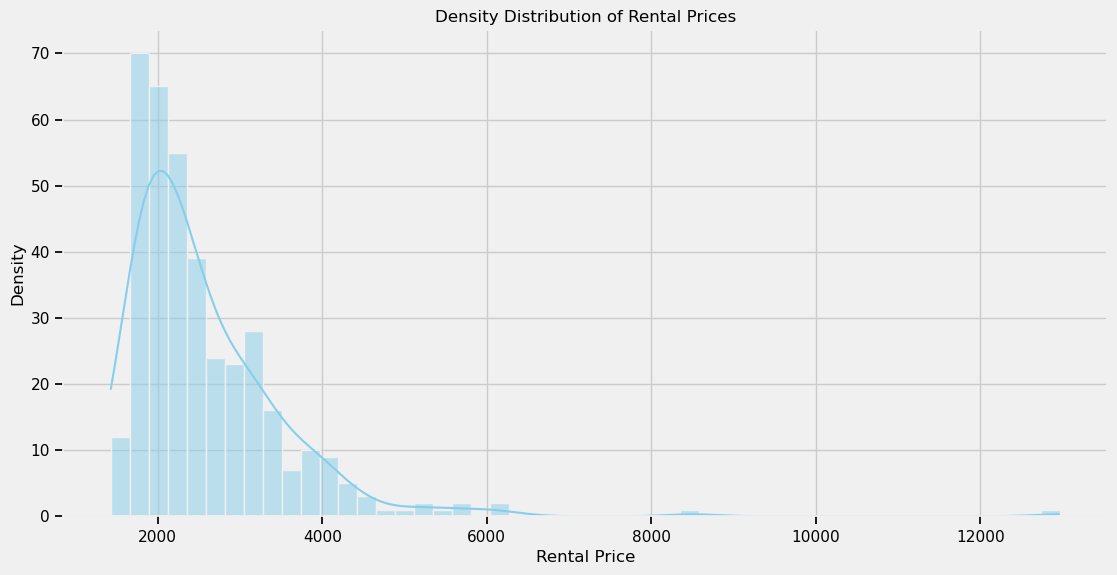

In [50]:
# Plot the distribution of rental prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Rental price'], kde=True, color="skyblue", bins=50)
plt.xlabel('Rental Price')
plt.ylabel('Density')
plt.title('Density Distribution of Rental Prices')
plt.show()

Comments on the  distribution.

The most common rent price is 2000$. 

The distribution is right skewed

#### Location Distribution of Rent Listings

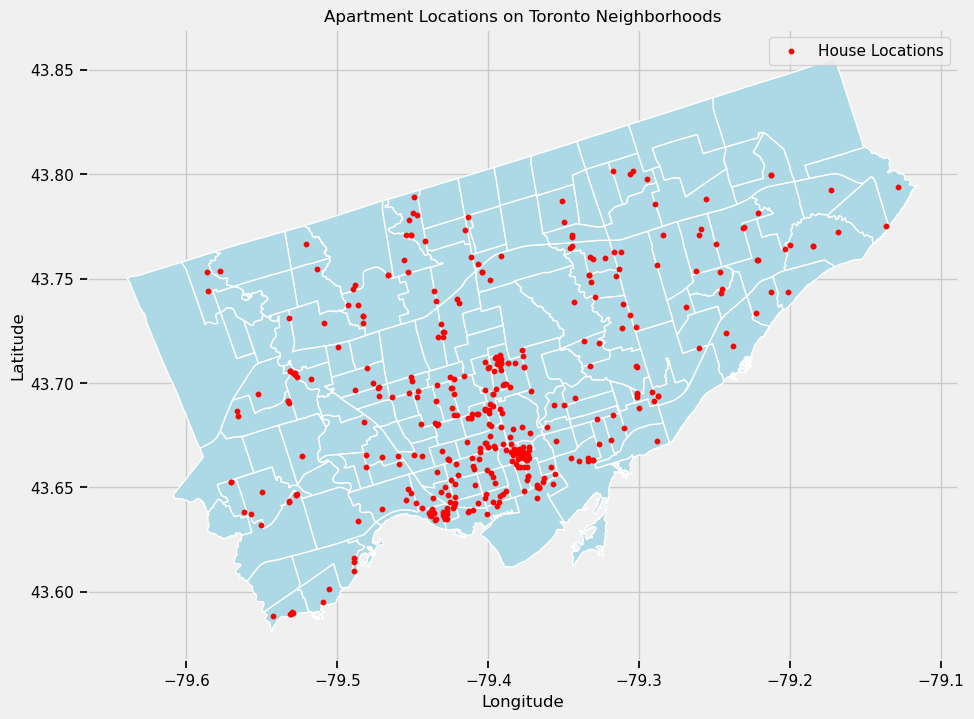

In [45]:
# Load the shapefile (use the path to the .shp file)
neighbourhoods = gpd.read_file('Neighbourhoods - 4326.shp')

# Plot neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Plot house locations
plt.scatter(df['Longitude'],df['Latitude'], color='red', s=10, label="House Locations")

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Apartment Locations on Toronto Neighborhoods")

plt.show()

Most of the listings are in downtown Toronto, so when we do the train/test split we will make sure the train val, and test have the same porportion of listings from downtown.

#### Living Area and Rent Price

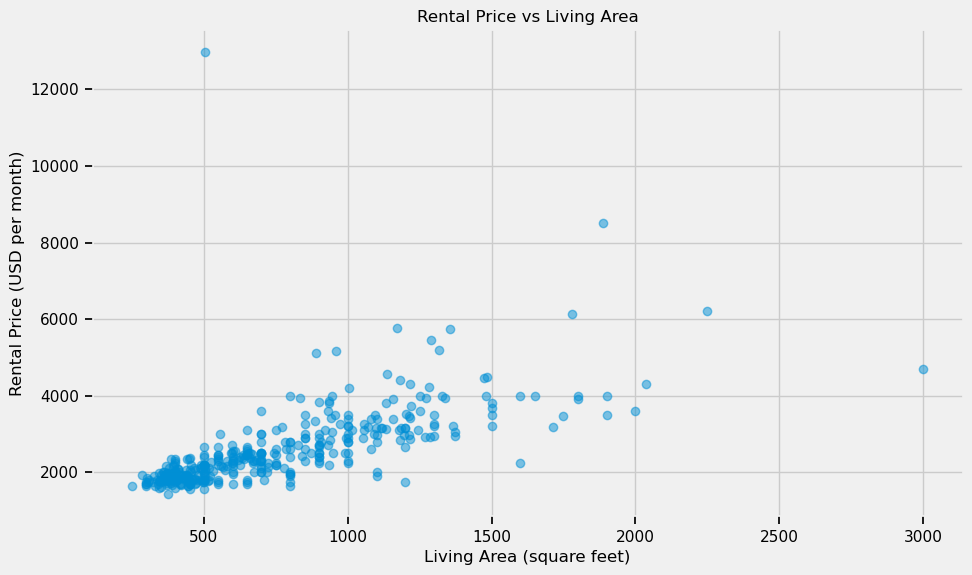

In [61]:
# Plot Rental price vs Living area
plt.figure(figsize=(10, 6))
plt.scatter(df['Living area'], df['Rental price'], alpha=0.5)
plt.xlabel('Living Area (square feet)')
plt.ylabel('Rental Price (USD per month)')
plt.title('Rental Price vs Living Area')
plt.show()

There seems to be some outliers. They will be check individualy via going to their listings page and verifiying if it is correct

In [74]:
# Filter for outliers: price above 5000 or area above 2000
outliers = df[(df['Rental price'] > 5000) | (df['Living area'] > 2000)]

# Display each outlier's information in a single row format
for index, row in outliers.iterrows():
    print(f"URL: {row['Property URL']}, Price: {row['Rental price']}, Area: {row['Living area']} sqft")

URL: https://www.zillow.com/homedetails/600-Brookdale-Ave-Toronto-ON-M5M-1S4/384437673_zpid/, Price: 5200.0, Area: 1316.0 sqft
URL: https://www.zillow.com/homedetails/207-Davisville-Ave-Toronto-ON-M4S-1G8/441175304_zpid/, Price: 4300.0, Area: 2038.0 sqft
URL: https://www.zillow.com/b/minto-yorkville-toronto-on-BMCLyH/, Price: 12968.0, Area: 503.0 sqft
URL: https://www.zillow.com/b/the-ivy-toronto-on-BMLDxT/, Price: 5107.0, Area: 888.0 sqft
URL: https://www.zillow.com/homedetails/270-Davenport-Rd-Toronto-ON-M5R-1J6/2063443293_zpid/, Price: 6200.0, Area: 2249.0 sqft
URL: https://www.zillow.com/b/waverley-toronto-on-BtvWvk/, Price: 5775.0, Area: 1172.0 sqft
URL: https://www.zillow.com/homedetails/455-Wellington-St-W-Toronto-ON-M5V-1E7/347144785_zpid/, Price: 8500.0, Area: 1886.0 sqft
URL: https://www.zillow.com/b/the-thomas-toronto-on-BVgsVC/, Price: 6130.0, Area: 1780.0 sqft
URL: https://www.zillow.com/b/immix-toronto-on-CcSzy6/, Price: 5175.0, Area: 959.0 sqft
URL: https://www.zillow.co

The $12968 listing is supposed to be some sort of penthouse and its area is not 503 ft, im not sure how big is actually so it will be removed.

In [78]:
# Filter out listings with price higher than 12000
df = df[df['Rental price'] <= 12000]

# Verify the filtering by checking the maximum price
print("Maximum rental price after filtering:", df['Rental price'].max())

Maximum rental price after filtering: 8500.0


#### Number of bedrooms and price

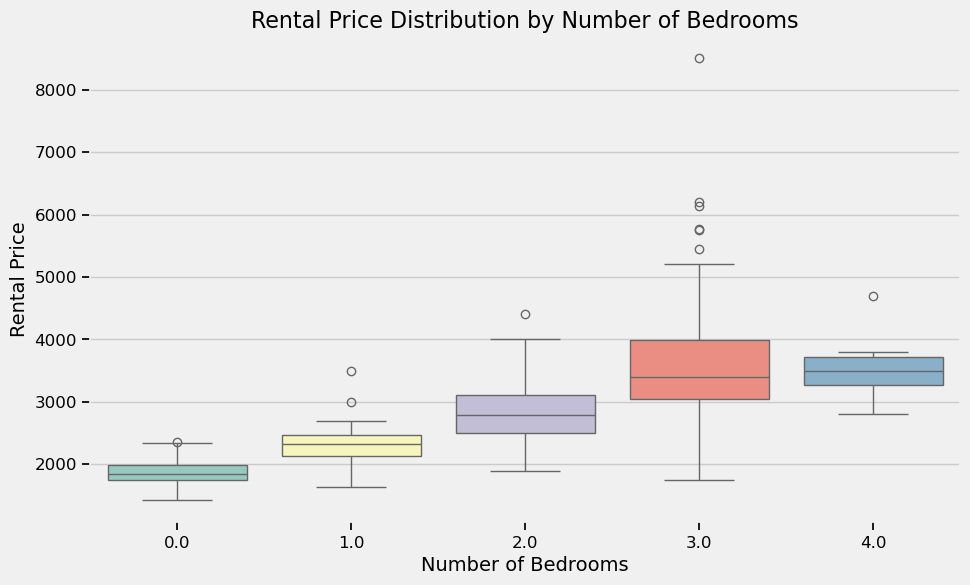

In [82]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bedrooms', y='Rental price', palette='Set3')

# Customize the plot
plt.title('Rental Price Distribution by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Rental Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

#### Number of Bathrooms and Rent Price

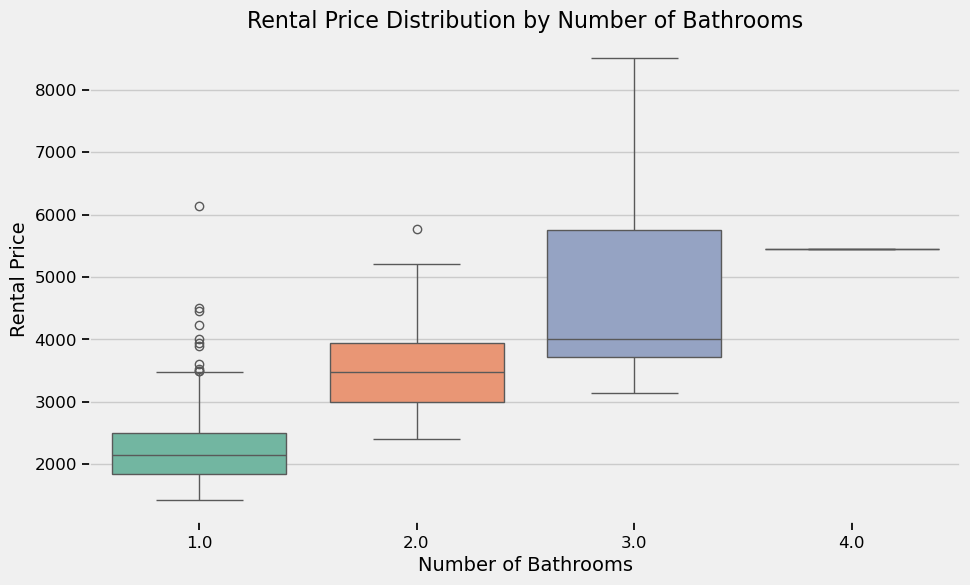

In [87]:
# Create the box plot for Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bathrooms', y='Rental price', palette='Set2')

# Customize the plot
plt.title('Rental Price Distribution by Number of Bathrooms', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Rental Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

#### Neighbourhood Rank and Rent Price

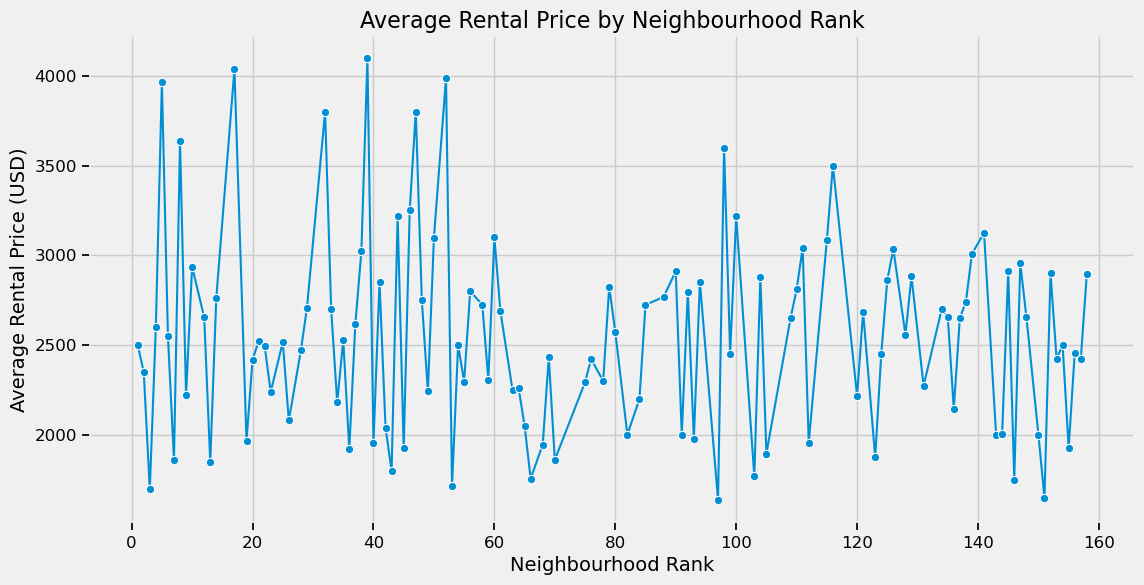

In [100]:
# Calculate the average rental price by neighborhood rank
avg_price_by_rank = df.groupby('Neighbourhood Rank')['Rental price'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_rank, x='Neighbourhood Rank', y='Rental price', marker='o')

# Customize the plot
plt.title('Average Rental Price by Neighbourhood Rank', fontsize=16)
plt.xlabel('Neighbourhood Rank', fontsize=14)
plt.ylabel('Average Rental Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

The trend is not always true but it does seems that the expensive averages are in the higher ranked neighbourhoods

### 3. Feature Engineering

### Split data in to train/val/test

In [131]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [249]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate

The train, val, and test are divide somewhat evenly geographically since I divided the data into clusters beased on where they are and the train and test sets needs to have a proportional amount of data from each cluster.

In [109]:
# Reset the index of the DataFrame to ensure sequential indices
df = df.reset_index(drop=True)

# Define the number of clusters (e.g., 10 clusters)
num_clusters = 3

# Perform clustering on latitude and longitude
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Initialize StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the stratified split for train and temp (which we'll split into validation and test later)
for train_index, temp_index in splitter.split(df, df['LocationCluster']):
    train = df.loc[train_index].reset_index(drop=True)
    temp = df.loc[temp_index].reset_index(drop=True)

# Split temp further into validation and test sets
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in stratified_splitter.split(temp, temp['LocationCluster']):
    val = temp.loc[val_index].reset_index(drop=True)
    test = temp.loc[test_index].reset_index(drop=True)

# Verify the distribution
print("Train set cluster distribution:\n", train['LocationCluster'].value_counts())
print("\nValidation set cluster distribution:\n", val['LocationCluster'].value_counts())
print("\nTest set cluster distribution:\n", test['LocationCluster'].value_counts())

Train set cluster distribution:
 LocationCluster
0    176
2     64
1     60
Name: count, dtype: int64

Validation set cluster distribution:
 LocationCluster
0    22
1     8
2     8
Name: count, dtype: int64

Test set cluster distribution:
 LocationCluster
0    23
2     8
1     7
Name: count, dtype: int64


#### Preprocess_data function that wiill perform the split and remove outliers

In [206]:

def preprocess_data(df, price_threshold=12000, area_threshold=5000, 
                                     test_size=0.2, val_size=0.2, n_clusters=3, random_state=42):
  
    # Step 1: Remove outliers
    filtered_df = df[(df['Rental price'] <= price_threshold) & (df['Living area'] <= area_threshold)]

    # Step 2: Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    filtered_df['Cluster'] = kmeans.fit_predict(filtered_df[['Latitude', 'Longitude']])
    
    # Step 3: Split based on clustering
    train_val, test = train_test_split(
        filtered_df, test_size=test_size, random_state=random_state, stratify=filtered_df['Cluster']
    )

    # Adjust val_size relative to train+val
    val_size_adjusted = val_size / (1 - test_size)

    train, val = train_test_split(
        train_val, test_size=val_size_adjusted, random_state=random_state, stratify=train_val['Cluster']
    )

    # Drop the 'Cluster' column before returning
    train = train.drop(columns=['Cluster'])
    val = val.drop(columns=['Cluster'])
    test = test.drop(columns=['Cluster'])

    return train, val, test



In [208]:
train, val, test = preprocess_data(
    df,
    price_threshold=12000,  # Define outlier thresholds for rental price
    area_threshold=5000,    # Define outlier thresholds for living area (5000 basically means I'm keeping eveything)
    test_size=0.2,          # 20% test set
    val_size=0.2,           # 20% of train+val for validation
    n_clusters=3,          # Number of KMeans clusters
    random_state=42
)

print(f"Train Size: {len(train)}, Validation Size: {len(val)}, Test Size: {len(test)}")

Train Size: 225, Validation Size: 75, Test Size: 76


#### Training Set

<Axes: >

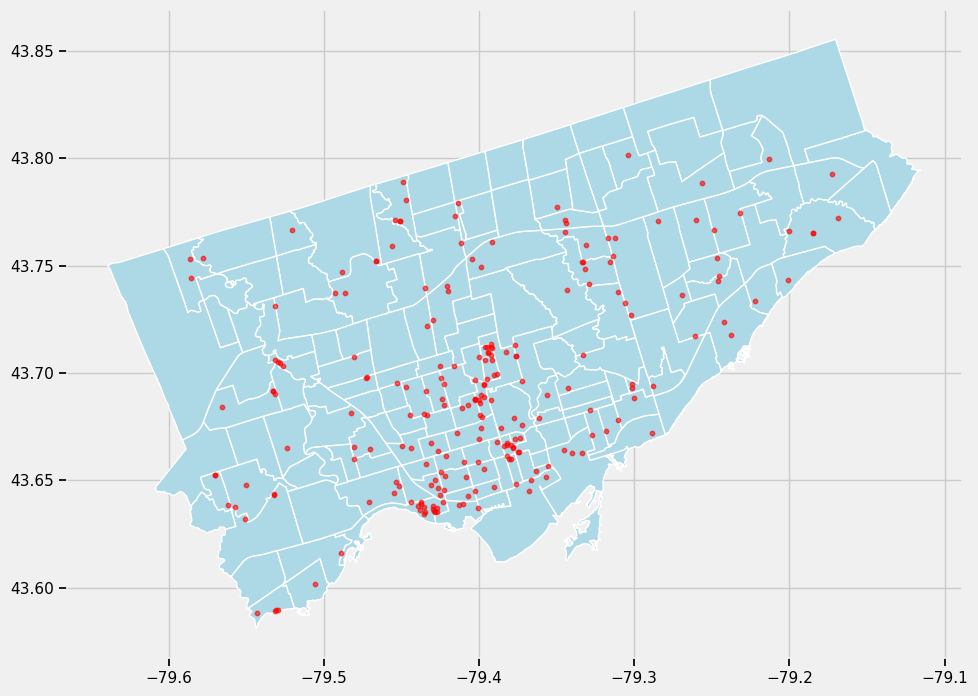

In [212]:
geometry = [Point(xy) for xy in zip(train['Longitude'], train['Latitude'])]
train_gdf = gpd.GeoDataFrame(train, geometry=geometry, crs='EPSG:4326')

# Plot the map with neighborhood boundaries
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Overlay the apartment locations from the training set
train_gdf.plot(ax=ax, color='red', markersize=10, label="Train Set Locations", alpha=0.6)

#### Val set

<Axes: >

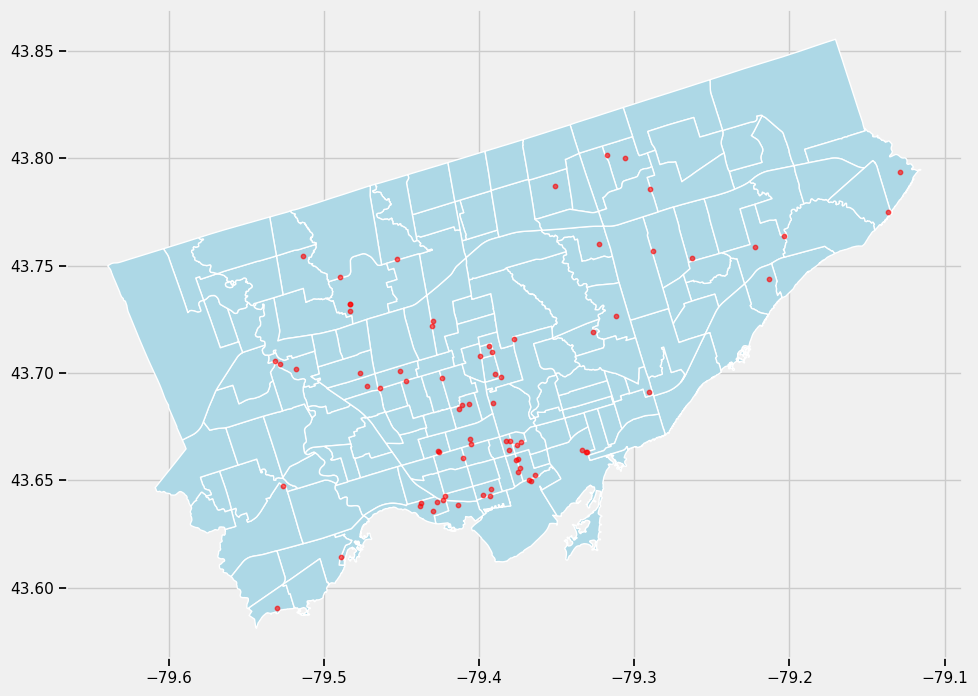

In [215]:
geometry = [Point(xy) for xy in zip(val['Longitude'], val['Latitude'])]
val_gdf = gpd.GeoDataFrame(val, geometry=geometry, crs='EPSG:4326')

# Plot the map with neighborhood boundaries
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Overlay the apartment locations from the training set
val_gdf.plot(ax=ax, color='red', markersize=10, label="Train Set Locations", alpha=0.6)

### Create Features

In [120]:
def create_features(df):
    # Drop the Property URL column
    df = df.drop(columns=['Property URL'], errors='ignore')
    
    # Step 1: Apply PCA to Latitude and Longitude to create PC1
    pca = PCA(n_components=1)
    df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].fillna(df[['Latitude', 'Longitude']].mean())
    df['PC1'] = pca.fit_transform(df[['Latitude', 'Longitude']])
    
    # Step 2: Select relevant features (no dummy encoding for Bedrooms and Bathrooms)
    feature_df = df[['Bedrooms', 'Bathrooms', 'Neighbourhood Rank', 'Living area', 'PC1']]
    
    # Step 3: Normalize all features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_df)
    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df

# Example Usage:
# Apply the function to the dataset
features = create_features(train)
print(features.head())

   Bedrooms  Bathrooms  Neighbourhood Rank  Living area       PC1
0  0.566691  -0.445634            0.585258     0.858590  1.878160
1 -1.060174  -0.445634            0.543945    -1.034208 -0.396493
2 -0.246741  -0.445634           -0.261645     0.101471 -1.896772
3  0.566691   1.611139           -1.129203     0.227657 -0.437409
4 -1.060174  -0.445634            0.915756    -0.976162 -2.041855


#### Prediction Power of each Feature

#### Feature Importance from a Random Forest

              Feature  Importance
0            Bedrooms    0.420249
3         Living area    0.266212
2  Neighbourhood Rank    0.174079
1           Bathrooms    0.079831
4                 PC1    0.059628


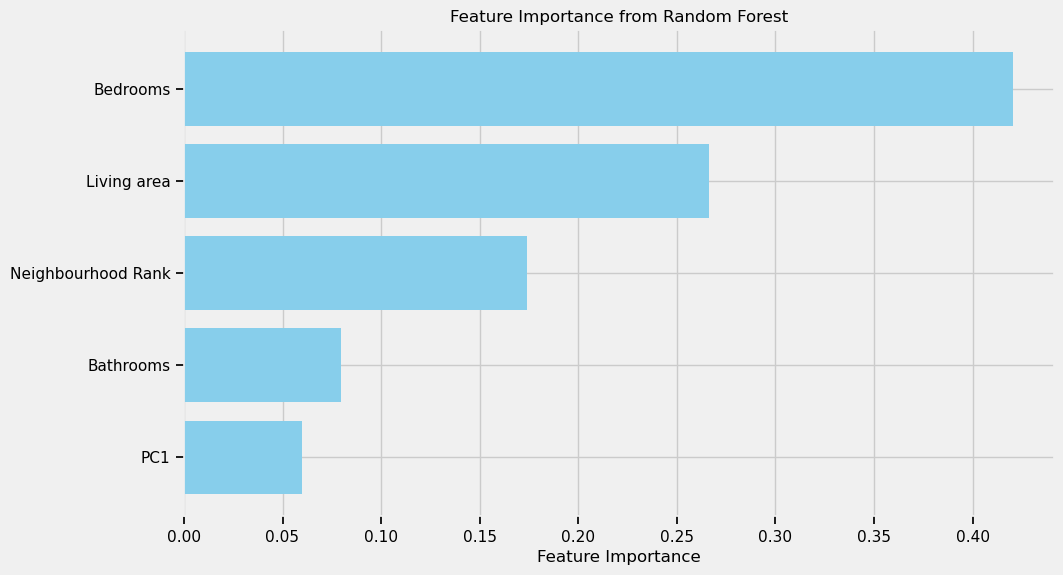

In [154]:
X = features
y = train['Rental price']

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance on top
plt.show()

PC1 looks not very helpful

####  Correlation with Target Variable

Living area           0.784416
Bedrooms              0.756510
Bathrooms             0.689491
PC1                   0.107907
Neighbourhood Rank   -0.100808
Name: Rental price, dtype: float64


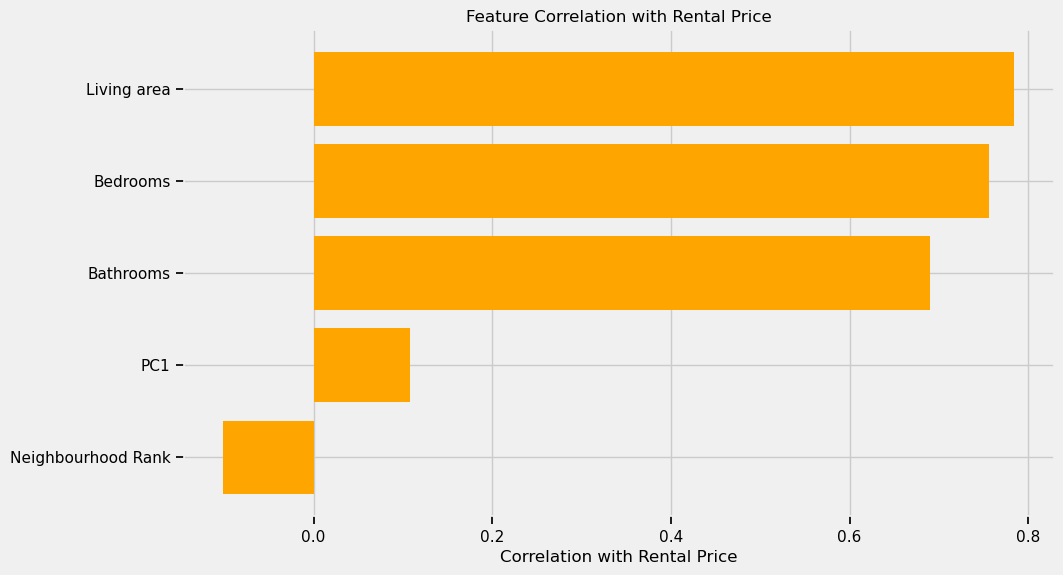

In [141]:
# Compute correlation with the target variable
correlations = X.join(y).corr()['Rental price'].drop('Rental price')

# Display correlations
correlations = correlations.sort_values(ascending=False)
print(correlations)

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.barh(correlations.index, correlations.values, color='orange')
plt.xlabel('Correlation with Rental Price')
plt.title('Feature Correlation with Rental Price')
plt.gca().invert_yaxis()
plt.show()

#### Permutation Importance. This measures the decrease in model performance when a feature's values are randomly shuffled, making it useless. 

In [145]:
from sklearn.inspection import permutation_importance

              Feature  Importance
0            Bedrooms    0.792082
2  Neighbourhood Rank    0.310669
3         Living area    0.300959
4                 PC1    0.074840
1           Bathrooms    0.047004


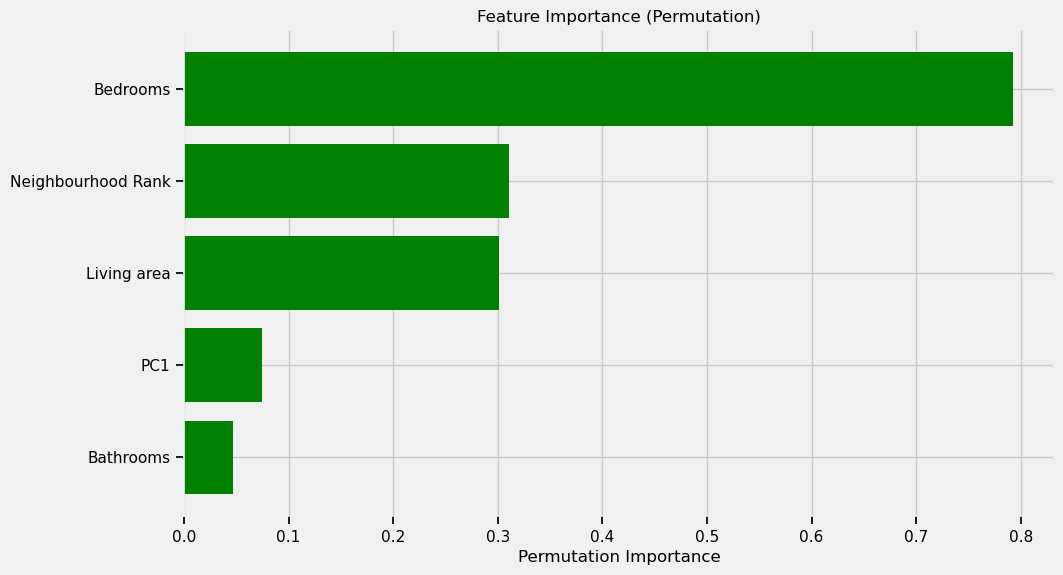

In [147]:
# Compute permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)

# Extract results
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance['importances_mean']
}).sort_values(by='Importance', ascending=False)

# Display permutation importances
print(perm_importance_df)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='green')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()

#### Check for Redundant Features

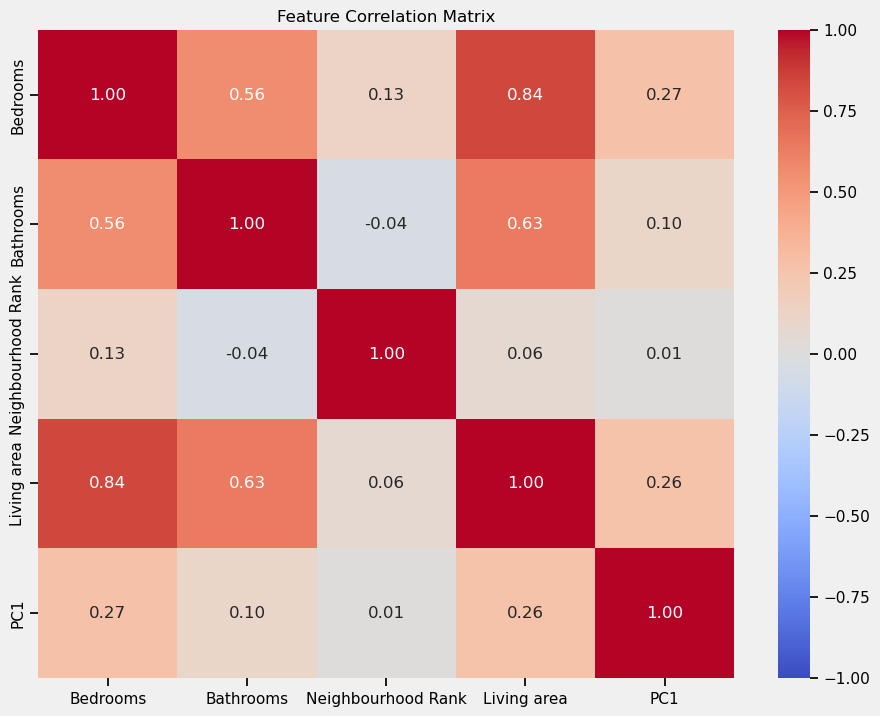

Highly Correlated Features:
Empty DataFrame
Columns: [Bedrooms, Bathrooms, Neighbourhood Rank, Living area, PC1]
Index: []


In [151]:
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify highly correlated pairs (absolute correlation > 0.9)
high_correlation = correlation_matrix[(correlation_matrix.abs() > 0.9) & (correlation_matrix.abs() < 1)]
print("Highly Correlated Features:")
print(high_correlation.dropna(how='all'))

No features are highly redundant since the correlations are all lower than 0.9

#### Mutiple different version of create_features function that keeps different features

#### No PC1

In [159]:
def create_features_without_pc1(df):
    # Drop the Property URL column
    df = df.drop(columns=['Property URL'], errors='ignore')
    
    # Select relevant features (excluding PC1 creation)
    feature_df = df[['Bedrooms', 'Bathrooms', 'Neighbourhood Rank', 'Living area']]
    
    # Normalize all features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_df)
    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df

#### Only Bedrooms, Living area, and Neighbourhood Rank

In [219]:
def create_features_living_bedrooms_rank(df):
    # Drop the Property URL column
    df = df.drop(columns=['Property URL'], errors='ignore')
    
    # Select relevant features (Living area, Bedrooms, Neighbourhood Rank)
    feature_df = df[['Living area', 'Bedrooms', 'Neighbourhood Rank']]
    
    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_df)
    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df

#### Only bedroom number and living area

In [163]:
def create_features_living_bedrooms(df):
    # Drop the Property URL column
    df = df.drop(columns=['Property URL'], errors='ignore')
    
    # Select relevant features (only Living area and Bedrooms)
    feature_df = df[['Living area', 'Bedrooms']]
    
    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_df)
    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df

### 4. Modeling

#### Model that Always Predicts the Mean

In [171]:
# Calculate the mean rent from the training set
mean_rent = train['Rental price'].mean()

# Create baseline predictions for both training and validation sets
y_train_baseline = np.full_like(train['Rental price'], fill_value=mean_rent)
y_val_baseline = np.full_like(val['Rental price'], fill_value=mean_rent)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(train['Rental price'], y_train_baseline))
val_rmse = np.sqrt(mean_squared_error(val['Rental price'], y_val_baseline))

# Calculate R² for training and validation sets
train_r2 = r2_score(train['Rental price'], y_train_baseline)
val_r2 = r2_score(val['Rental price'], y_val_baseline)

# Display results
print("Baseline Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}, Training R²: {train_r2:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}, Validation R²: {val_r2:.2f}")

Baseline Model Performance:
Training RMSE: 885.51, Training R²: 0.00
Validation RMSE: 757.78, Validation R²: -0.00


#### 4.1 Linear Model

In [267]:
from sklearn.linear_model import LinearRegression
# Prepare training and validation sets
X_train = create_features(train)  # Replace with chosen create features function
y_train = train['Rental price']

X_val = create_features(val)  # Replace with your chosen create features function
y_val = val['Rental price']

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Evaluate the model on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Linear Regression Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}, Training R²: {train_r2:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}, Validation R²: {val_r2:.2f}")

Linear Regression Model Performance:
Training RMSE: 393.05, Training R²: 0.77
Validation RMSE: 597.47, Validation R²: 0.69


#### 4.2 Random Forest Model

In [243]:
# Prepare training and validation features and target
X_train = create_features(train)  # Replace with your chosen feature function, there are multiple version in this notebook
y_train = train['Rental price']

X_val = create_features(val)  # Replace with your chosen feature function
y_val = val['Rental price']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,         # Number of trees in the forest
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider for the best split
    random_state=42           # Random seed for reproducibility
)
rf_model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# Calculate RMSE and R² for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Display results
print("Random Forest Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}, Training R²: {train_r2:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}, Validation R²: {val_r2:.2f}")

Random Forest Model Performance:
Training RMSE: 144.23, Training R²: 0.97
Validation RMSE: 567.65, Validation R²: 0.72


#### 4.2.1 Hyperparameters. Go back and forth between this step and the random forest to find the best model (need Nicolas's data set for this)

In [239]:
from sklearn.model_selection import GridSearchCV
# Define a custom scoring function for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Convert the function to a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)  # False because lower RMSE is better

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with RMSE scoring
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring=rmse_scorer, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Negate because `greater_is_better=False`

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 374.2342461993176


In [261]:
#Perform cross-validation 
cv_results = cross_validate(
    estimator=rf_model,
    X=X_train,  # Features
    y=y_train,  # Target
    scoring={'RMSE': rmse_scorer, 'R2': 'r2'},  # Calculate RMSE and R²
    cv=5,  # Number of folds
    n_jobs=1,  
    return_train_score=True  # Include training scores
)

# Extract RMSE and R² scores
train_rmse = -cv_results['train_RMSE']  # Negate RMSE to make it positive
val_rmse = -cv_results['test_RMSE']     # Negate RMSE to make it positive
train_r2 = cv_results['train_R2']
val_r2 = cv_results['test_R2']

# Compute mean and standard deviation
train_rmse_mean = np.mean(train_rmse)
train_rmse_std = np.std(train_rmse)
val_rmse_mean = np.mean(val_rmse)
val_rmse_std = np.std(val_rmse)

train_r2_mean = np.mean(train_r2)
train_r2_std = np.std(train_r2)
val_r2_mean = np.mean(val_r2)
val_r2_std = np.std(val_r2)

# Print results
print("Mean Training RMSE:", train_rmse_mean, "±", train_rmse_std)
print("Mean Validation RMSE:", val_rmse_mean, "±", val_rmse_std)

print("Mean Training R²:", train_r2_mean, "±", train_r2_std)
print("Mean Validation R²:", val_r2_mean, "±", val_r2_std)

Mean Training RMSE: 147.91949650968735 ± 7.875631537308789
Mean Validation RMSE: 365.3832318611675 ± 79.37964051537524
Mean Training R²: 0.9667479765388887 ± 0.0023591140242934265
Mean Validation R²: 0.7948079829417036 ± 0.03287379042563843


#### 4.3 Final Model

### 5. Prediction